(1258702, 100, 2)
(1292542, 100, 2)

In [14]:
import numpy as np
import scipy
from scipy import stats

array1 = np.random.rand(6, 4, 2)
array2 = np.random.rand(6, 4, 2)

In [15]:
array1.shape

(6, 4, 2)

In [16]:
dataset = [array1, array2]
print(len(dataset))
print(len(dataset[0]))


2
6


In [17]:
global num_features
num_features = 2

def extract_features(extracted_data, chunk_size = dataset[0].shape[1]):
    freq = 100 # Data frequency of 200HZ
    num_chunks = extracted_data.shape[0]//chunk_size
    num_sensors = extracted_data.shape[2]
    features = np.zeros((num_chunks, num_features*num_sensors))
    
    positive = 0
    negative = 0
    
    
    for i in range(num_chunks):
        chunk = extracted_data[i*chunk_size:(i+1)*chunk_size, :, :]

        fft_sum_list = []
        fft_sum_list_1 = []

        fft_vals = np.fft.fft(chunk[i,])
        print(f'fft_vals {fft_vals}')



        for j in range(num_sensors):                
            fft_vals_1 = np.fft.fft(chunk[j,])
            #print(fft_vals_1)
            fft_sum_1 = np.sum(np.abs(fft_vals_1))/freq

            fft_sum_list_1.append(fft_sum_1)




        positive_count = np.count_nonzero(fft_vals_1 > 0)
        negative_count = np.count_nonzero(fft_vals_1 < 0)
        positive += positive_count
        negative += negative_count
        print("Number of positive values:", positive_count)
        print("Number of negative values:", negative_count)


        fft_sum_list = np.array(fft_sum_list)

        features[i,:] = np.concatenate([fft_sum_list])
        global feature_names
        feature_names = ['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2',\
            'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
    print(f'total positive values for position {positive}')
    print(f'total negative values for position {negative}')        
    return features


In [18]:
chunk_size = 100
array4 = np.random.rand(200, 100, 2)
num_chunks = array4.shape[0]//chunk_size
print(num_chunks)

2


In [19]:
for i in range (len(dataset)):
    print(len(dataset[i]))
    for j in range(len(dataset[i])):
        #mean = np.mean(dataset[i][j], axis=(0, 1))
        for k in range(dataset[i].shape[2]):
        #    print(dataset[j][k])
        #    print('\n')
        
        
            mean = np.mean(dataset[i][j])

6
6


In [20]:
print(len(dataset))

2


In [21]:
print(dataset[0][0][0])

[0.92527369 0.13716533]


In [22]:
array5 = np.random.rand(2, 2, 2)
print(array5)
mean_array = np.mean(array5[0], axis=0)
print("mean")
print(mean_array)

[[[0.28657609 0.42037243]
  [0.6321543  0.66513136]]

 [[0.0587059  0.95862474]
  [0.07897694 0.29221551]]]
mean
[0.4593652  0.54275189]


In [23]:
print(mean_array[0])
print(mean_array[1])

0.4593651982875979
0.5427518932774451


In [24]:
array5.shape

(2, 2, 2)

In [25]:
global num_features
num_features = 12
def feature_extraction(data):
    freq = 100
    mean_array = np.empty((len(data),2), dtype = float)
    median_array = np.empty((len(data),2), dtype = float)
    std_array = np.empty((len(data),2), dtype = float)
    min_val_array = np.empty((len(data),2), dtype = float)
    max_val_array = np.empty((len(data),2), dtype = float)
    sum_val_array = np.empty((len(data),2), dtype = float)
    for i in range(len(data)):
        mean_array[i] = np.mean(data[i], axis=0)
        median_array[i] = np.median(data[i], axis=0)
        std_array[i] = np.std(data[i], axis=0)
        min_val_array[i] = np.min(data[i], axis=0)
        max_val_array[i] = np.max(data[i], axis=0)
        sum_val_array[i] = np.sum(data[i], axis=0)/freq
        
    
    mean_sensor_1 = mean_array[:,0]
    mean_sensor_2 = mean_array[:,1]
    median_sensor_1 = median_array[:,0]
    median_sensor_2 = median_array[:,1]
    std_sensor_1 = std_array[:,0]
    std_sensor_2 = std_array[:,1]
    min_sensor_1 = min_val_array[:,0]
    min_sensor_2 = min_val_array[:,1]
    max_sensor_1 = max_val_array[:,0]
    max_sensor_2 = max_val_array[:,1]
    sum_sensor_1 = sum_val_array[:,0]
    sum_sensor_2 = sum_val_array[:,1]
    print(mean_sensor_1)
    print(sum_sensor_2)
    
    features = np.zeros((len(data), num_features*2))
    
    for i in range(num_features):
        features[i,:] = np.concatenate([mean_sensor_1, mean_sensor_2, median_sensor_1, median_sensor_2, std_sensor_1, std_sensor_2,\
            min_sensor_1, min_sensor_2, max_sensor_1, max_sensor_2, sum_sensor_1, sum_sensor_2])
        
    global feature_names
    feature_names = ['mean', 'mean_2', 'median', 'median_2', 'std', 'std_2', 'min_val', 'min_val_2',\
        'max_val', 'max_val_2', 'sum_val', 'sum_val_2', 'kurtosis', 'kurtosis_2', 'skew', 'skew_2', 'fft_sum', 'fft_sum_2']
    
    
        
    #print(mean_sensor_2)
    #print(mean_array)

In [26]:
feature_extraction(array5)
np.mean(array5[0], axis=0)

[0.4593652  0.06884142]
[0.01085504 0.0125084 ]


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
feature_extraction(array5)

[0.44636682 0.10401913]
[0.00500461 0.00455538]


In [ ]:
array7 = np.random.rand(20, 10, 2)

#fft_vals = np.fft.fft(chunk[i,])
#print(f'fft_vals {fft_vals}')

for i in range(len(array7)):
        fft_vals = np.fft.fft(array7[i])
        print(fft_vals)
        
        positive_count = np.count_nonzero(fft_vals > 0)
        negative_count = np.count_nonzero(fft_vals < 0)
        print(positive_count)
        print(negative_count)
        
        


[[ 8.05975737e-01+0.j -6.69567893e-01+0.j]
 [ 1.89818160e+00+0.j -6.28797235e-02+0.j]
 [ 5.80552931e-01+0.j  1.24435859e-01+0.j]
 [ 3.16789794e-01+0.j -1.35594258e-01+0.j]
 [ 1.29386397e+00+0.j  4.44551563e-01+0.j]
 [ 1.26783398e+00+0.j -3.86335848e-01+0.j]
 [ 5.18508222e-01+0.j -2.46875332e-01+0.j]
 [ 5.91668696e-02+0.j  1.79679956e-03+0.j]
 [ 1.18855999e+00+0.j -6.17464821e-01+0.j]
 [ 8.33414216e-01+0.j  3.96385003e-01+0.j]]
14
6
[[ 1.00491917+0.j -0.72081333+0.j]
 [ 1.03725059+0.j -0.35377219+0.j]
 [ 1.59945925+0.j -0.04354942+0.j]
 [ 0.69158299+0.j -0.18424637+0.j]
 [ 0.94338054+0.j  0.40719309+0.j]
 [ 0.50199375+0.j -0.42997151+0.j]
 [ 1.11210146+0.j -0.25296909+0.j]
 [ 1.35479136+0.j -0.40138472+0.j]
 [ 1.47908387+0.j -0.31541318+0.j]
 [ 0.795272  +0.j  0.60994545+0.j]]
12
8
[[ 0.96326183+0.j  0.44149543+0.j]
 [ 1.15194335+0.j -0.66439116+0.j]
 [ 1.16927071+0.j  0.69155881+0.j]
 [ 0.40883756+0.j -0.0030126 +0.j]
 [ 1.02112416+0.j  0.85134332+0.j]
 [ 1.63179202+0.j  0.0247061 +0.j

In [ ]:
array8 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
fft_vals = np.fft.fft(array8)
print(fft_vals)

[136. +0.j          -8.+40.21871594j  -8.+19.3137085j   -8.+11.9728461j
  -8. +8.j          -8. +5.3454291j   -8. +3.3137085j   -8. +1.59129894j
  -8. +0.j          -8. -1.59129894j  -8. -3.3137085j   -8. -5.3454291j
  -8. -8.j          -8.-11.9728461j   -8.-19.3137085j   -8.-40.21871594j]


In [ ]:
array9 = np.random.rand(10, 10)
print(array9, end = '\n\n')
fft_vals = np.fft.fft(array9)
print(fft_vals, end = '\n\n')

for i in range(len(array9[0])):
    fft_vals2 = np.fft.fft(array9[0])
    
print(fft_vals2, end = '\n\n')

fft_vals3 = np.fft.fft(array9[0])

print(fft_vals3)                      
                       

[[0.99997481 0.28248774 0.30898376 0.51546995 0.61810829 0.92647199
  0.04894968 0.70637222 0.11977002 0.81371487]
 [0.2884913  0.39626661 0.87935844 0.40199579 0.39362724 0.75179054
  0.57569826 0.71704461 0.00782393 0.97725002]
 [0.37902358 0.18580825 0.55416606 0.32025474 0.77682933 0.61349263
  0.88555698 0.92860825 0.26739064 0.94619847]
 [0.78118876 0.62144746 0.84204543 0.67587784 0.45797869 0.57539645
  0.32895248 0.05865526 0.57645894 0.57644728]
 [0.01956231 0.35693688 0.58129605 0.52744931 0.97344297 0.03449377
  0.53564304 0.89222959 0.37017057 0.40941317]
 [0.43006989 0.08394751 0.13766734 0.02765588 0.1456589  0.57039383
  0.34658351 0.49202067 0.82117847 0.27518959]
 [0.19891959 0.55319024 0.45825607 0.93553533 0.67569387 0.36476488
  0.65444269 0.10870999 0.22079024 0.04104458]
 [0.80124714 0.18441184 0.49264375 0.25626866 0.15329229 0.78413999
  0.06393295 0.42728698 0.54058094 0.87331338]
 [0.31081351 0.31378705 0.97894682 0.60862625 0.9567025  0.45773128
  0.58509797

In [ ]:
array10 = [[1,2,3,4,5,6,7,8,9,10],[11,12,13,14,15,16]]

print(np.fft.fft(array10[0]))

[55.+0.00000000e+00j -5.+1.53884177e+01j -5.+6.88190960e+00j
 -5.+3.63271264e+00j -5.+1.62459848e+00j -5.-1.33226763e-15j
 -5.-1.62459848e+00j -5.-3.63271264e+00j -5.-6.88190960e+00j
 -5.-1.53884177e+01j]


In [ ]:
array11 = np.random.rand(4, 4)
#print(array11, end = '\n\n')
fft_vals = np.fft.fft(array11)
print(fft_vals, end = '\n\n')
#print(fft_vals, end = '\n\n')

positive_count = np.count_nonzero(fft_vals > 0)
negative_count = np.count_nonzero(fft_vals < 0)
print(positive_count)
print(negative_count)



array12 = np.random.rand(8, 8, 2)
#print(array12)

'''
for i in range(len(array12[0])):
    print(f'Shape of the array: {array12[i].shape}')
    fft_vals = np.fft.fft(array12[0])
    print(fft_vals)
'''
#fft_val = np.fft.fft(array11[0])
#array11 = np.arange(2,2,2)
for i in range(len(array12[0])):
    print(f'Shape of the array: {array12[i].shape}')
    fft_vals = np.fft.fft(array12[0])
    print(fft_vals)


[[ 2.7734347 +0.j         -0.352921  +0.02659327j  0.46973158+0.j
  -0.352921  -0.02659327j]
 [ 2.62358434+0.j          0.64204997-0.0779269j  -0.50230571+0.j
   0.64204997+0.0779269j ]
 [ 2.25836509+0.j          0.03273862+0.06064644j  1.5509066 +0.j
   0.03273862-0.06064644j]
 [ 2.69356037+0.j         -0.54714424+0.06824787j  0.19113158+0.j
  -0.54714424-0.06824787j]]

11
5
Shape of the array: (8, 2)
[[ 0.4042099 +0.j  0.212178  +0.j]
 [ 1.81364674+0.j  0.05221817+0.j]
 [ 1.30265878+0.j  0.02879375+0.j]
 [ 0.18083823+0.j -0.09483376+0.j]
 [ 0.69095552+0.j  0.51474974+0.j]
 [ 0.50005908+0.j -0.05712805+0.j]
 [ 1.36854194+0.j -0.24718469+0.j]
 [ 0.98044778+0.j  0.57144034+0.j]]
Shape of the array: (8, 2)
[[ 0.4042099 +0.j  0.212178  +0.j]
 [ 1.81364674+0.j  0.05221817+0.j]
 [ 1.30265878+0.j  0.02879375+0.j]
 [ 0.18083823+0.j -0.09483376+0.j]
 [ 0.69095552+0.j  0.51474974+0.j]
 [ 0.50005908+0.j -0.05712805+0.j]
 [ 1.36854194+0.j -0.24718469+0.j]
 [ 0.98044778+0.j  0.57144034+0.j]]
Shape

In [ ]:
array13 = np.random.rand(1000)

fft_vals = np.fft.fft(array13)
print(fft_vals)



positive_count = np.count_nonzero(fft_vals > 0)
negative_count = np.count_nonzero(fft_vals < 0)
print(positive_count)
print(negative_count)

[ 4.93720590e+02 +0.j         -1.74780107e+00 +3.5343434j
 -5.45437327e+00 +1.02653018j -8.37356076e-01 -1.60745685j
 -3.12363375e+00-11.40654629j -4.47374086e+00 +0.81372818j
  8.26445176e+00 -0.75691682j  5.36778154e+00 +0.23551128j
 -2.90912638e+00 +5.91884003j -6.90625627e+00 -4.62807027j
  7.71592523e-01 -1.26061416j  4.11818886e+00 +1.13104239j
  6.74496180e+00 +2.05803132j  6.62504184e-01 +2.47146991j
 -9.08156694e-01 -2.58617905j  9.25602942e+00 +8.27126232j
 -3.22569751e+00+10.77940727j -7.08804674e+00 -3.29380877j
  3.71874443e+00 +2.13630816j -1.14711135e+00+14.55545578j
  1.46811002e+01 +1.27506771j  7.71032910e+00 -0.80809602j
 -2.96974813e+00 -8.54363775j -6.54515334e+00 -5.94209469j
  2.05581502e+00 -2.58054768j -2.83508430e+00 -0.53230463j
 -3.71846342e+00 +4.80769733j  2.07293936e-01 -0.96686894j
 -4.51927333e+00 +8.7089278j   2.92266296e+00 -1.01943525j
  2.49630375e+00 -4.97579771j -2.52029228e-01 +5.33551334j
 -1.45377478e+00 -4.46013144j  4.11356016e+00+11.58235571

In [ ]:
array14 = np.random.rand(10,10,10)

for i in range(len(array14[0])):
    for j in range(len(array14[1])):
        print(array14[0][1].shape)
        fft_vals = np.fft.fft(array14[0][1])
        
#print(fft_vals[0][0], end = '\n\n')
print(fft_vals)
positive_count = np.count_nonzero(fft_vals > 0)
negative_count = np.count_nonzero(fft_vals < 0)
print(f'number of positive fft values: {positive_count}')
print(f'number of negative fft values: {negative_count}', end = '\n\n')

print(fft_vals[0], end = '\n\n\n')




(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
[ 5.58827737+0.00000000e+00j -0.56014919-1.72182112e+00j
 -0.36358011+2.52669804e-02j -0.12150261-9.03851691e-01j
  0.34011985+3.62038669e-01j -1.37284982+2.22044605e-16j
  0.34011985-3.62038669e-01j -0.12150261+9.03851691e-01j
 -0.36358011-2.52669804e-02j -0.56014919+1.72182112e+00j]
number of positive fft values: 3
number of negative fft values: 7

(5.588277366166944+0j)




In [ ]:
i = 0
j = 0
k = 0
for i in range(len(array14[i])):
    for j in range(len(array14[j])):
        for k in range(len(array14[k])):
            fft_vals = np.fft.fft(array14)
            

print(fft_vals[0][0])

fft_vals2 = np.fft.fft(array14)
print(fft_vals2[0][0])


print(array14.shape)

[ 5.29658531+0.00000000e+00j  0.78113146-1.46923773e+00j
 -1.10888644-5.60207469e-01j  0.3274619 -3.02121766e-01j
  0.17284157-3.04598566e-01j  0.21486202+1.11022302e-16j
  0.17284157+3.04598566e-01j  0.3274619 +3.02121766e-01j
 -1.10888644+5.60207469e-01j  0.78113146+1.46923773e+00j]
[ 5.29658531+0.00000000e+00j  0.78113146-1.46923773e+00j
 -1.10888644-5.60207469e-01j  0.3274619 -3.02121766e-01j
  0.17284157-3.04598566e-01j  0.21486202+1.11022302e-16j
  0.17284157+3.04598566e-01j  0.3274619 +3.02121766e-01j
 -1.10888644+5.60207469e-01j  0.78113146+1.46923773e+00j]
(10, 10, 10)


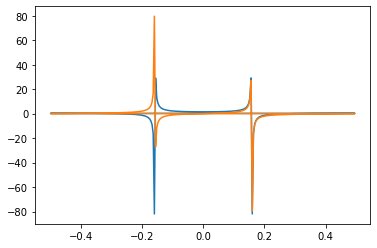

In [30]:
import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [32]:
i = 0
j = 0
k = 0
array14 = np.random.rand(10,10,10)
for i in range(len(array14[i])):
    for j in range(len(array14[j])):
        for k in range(len(array14[k])):
            fft_vals = np.fft.fft(array14)
            

print(fft_vals[0][0])

fft_vals2 = np.fft.fft(array14)
print(fft_vals2[0][0])


print(array14.shape)

[ 5.49675122+0.j         -0.06968198-0.21503619j  0.41795837+0.83715861j
 -0.16450327-0.57772053j  0.64751432+0.83229478j  0.33541543+0.j
  0.64751432-0.83229478j -0.16450327+0.57772053j  0.41795837-0.83715861j
 -0.06968198+0.21503619j]
[ 5.49675122+0.j         -0.06968198-0.21503619j  0.41795837+0.83715861j
 -0.16450327-0.57772053j  0.64751432+0.83229478j  0.33541543+0.j
  0.64751432-0.83229478j -0.16450327+0.57772053j  0.41795837-0.83715861j
 -0.06968198+0.21503619j]
(10, 10, 10)


In [39]:
array15 = np.random.rand(3,3,3)
fft_vals = np.fft.fftn(array15)
print(fft_vals)

[[[11.85786076+0.j         -1.21548292-0.81583192j
   -1.21548292+0.81583192j]
  [-1.00214293-0.2925168j   0.28360479+0.4892018j
   -0.5602514 +0.93102003j]
  [-1.00214293+0.2925168j  -0.5602514 -0.93102003j
    0.28360479-0.4892018j ]]

 [[ 0.93417035+1.62852475j  0.51601301-0.97077754j
    2.69116219+1.44175746j]
  [-1.55951275-0.26441094j -0.88779363-0.83126524j
    0.24546386+0.02031499j]
  [ 0.61883813-0.5887241j  -0.169154  +0.02882623j
   -0.51456961+0.49373048j]]

 [[ 0.93417035-1.62852475j  2.69116219-1.44175746j
    0.51601301+0.97077754j]
  [ 0.61883813+0.5887241j  -0.51456961-0.49373048j
   -0.169154  -0.02882623j]
  [-1.55951275+0.26441094j  0.24546386-0.02031499j
   -0.88779363+0.83126524j]]]


In [45]:
fft_vals = np.fft.fftn(array15)
print(fft_vals, end = '\n\n')
fft_vals2 = np.fft.fftn(np.sin(array15))
print(fft_vals2)

[[[12.85338023+0.j         -1.27046142-0.77438178j
   -1.27046142+0.77438178j]
  [-1.21055124-0.36047058j  0.2617867 +0.54574857j
   -0.71071504+1.07587812j]
  [-1.21055124+0.36047058j -0.71071504-1.07587812j
    0.2617867 -0.54574857j]]

 [[ 1.08070545+1.84795885j  0.59843501-1.24379366j
    3.14106551+1.61295842j]
  [-1.70537302-0.28535228j -1.08849697-0.82588422j
    0.20087942-0.04404603j]
  [ 0.66682256-0.6591458j  -0.25274809+0.01447281j
   -0.68139312+0.55833683j]]

 [[ 1.08070545-1.84795885j  3.14106551-1.61295842j
    0.59843501+1.24379366j]
  [ 0.66682256+0.6591458j  -0.68139312-0.55833683j
   -0.25274809-0.01447281j]
  [-1.70537302+0.28535228j  0.20087942+0.04404603j
   -1.08849697+0.82588422j]]]

[[[11.85786076+0.j         -1.21548292-0.81583192j
   -1.21548292+0.81583192j]
  [-1.00214293-0.2925168j   0.28360479+0.4892018j
   -0.5602514 +0.93102003j]
  [-1.00214293+0.2925168j  -0.5602514 -0.93102003j
    0.28360479-0.4892018j ]]

 [[ 0.93417035+1.62852475j  0.51601301-0.970

In [55]:
arr = [2,4,6,8,10,12,14,16,18,20]
arr2 = [[2,4,6,8,10],[12,14,16,18,20]]

arr = np.array(arr)
arr2 = np.array(arr2)

print(arr.shape)
print(arr2.shape)



(10,)
(2, 5)


In [56]:
fft_vals = np.fft.fft(arr)
fft_vals2 = np.fft.fftn(arr2)

In [58]:
print(fft_vals, end = '\n'*3)
print(fft_vals2)

[110.+0.00000000e+00j -10.+3.07768354e+01j -10.+1.37638192e+01j
 -10.+7.26542528e+00j -10.+3.24919696e+00j -10.-2.66453526e-15j
 -10.-3.24919696e+00j -10.-7.26542528e+00j -10.-1.37638192e+01j
 -10.-3.07768354e+01j]


[[ 1.10000000e+02 +0.j         -1.00000000e+01+13.7638192j
  -1.00000000e+01 +3.24919696j -1.00000000e+01 -3.24919696j
  -1.00000000e+01-13.7638192j ]
 [-5.00000000e+01 +0.j          0.00000000e+00 +0.j
  -1.77635684e-15 +0.j         -1.77635684e-15 +0.j
   0.00000000e+00 +0.j        ]]


In [164]:
arr3 = np.random.rand(4,3,2)
mean_array = np.empty((len(arr3),2), dtype = float)
fft_vals = np.empty((len(arr3),2), dtype = float)
#print(len(arr3[2]))
arr3[0].shape
i=0
j=0

for i in range(len(arr3)):
        mean_array[i] = np.mean(arr3[i], axis=0)
        for j in range(len(arr3[1])):
                pass
                #print(arr3[i][j])
                #print(arr3[i][j].shape)
                #fft_vals[i]
flat_arr = arr3.reshape(len(arr3)*len(arr3[1]), len(arr3[0][1]))
print(flat_arr)
             
#print('\n'*3)
#print(arr3)

k = 0
for k in range(len(arr3[1])):
        chunk = flat_arr[k * len(arr3[1]) : (k + 1) * len(arr3[1]), ]
        
        #print(chunk, end = '\n'*4)
        sensor_1 = chunk[:,0]
        sensor_2 = chunk[:,1]
        #sp = np.fft.fft(np.sin(chunk))
        print(sensor_1)
        print(sensor_2)
#print(mean_array)

#print('\n'*3)


#print(fft_vals)

[[0.54166082 0.0541044 ]
 [0.79453175 0.26788243]
 [0.5010332  0.47184103]
 [0.63171915 0.65624316]
 [0.18670045 0.59854608]
 [0.08751752 0.85520397]
 [0.17996422 0.74783698]
 [0.01380586 0.24140982]
 [0.16055403 0.0644859 ]
 [0.67869191 0.56778961]
 [0.35938445 0.21978125]
 [0.70658148 0.29465343]]
[0.54166082 0.79453175 0.5010332 ]
[0.0541044  0.26788243 0.47184103]
[0.63171915 0.18670045 0.08751752]
[0.65624316 0.59854608 0.85520397]
[0.17996422 0.01380586 0.16055403]
[0.74783698 0.24140982 0.0644859 ]


In [144]:
arr3 = np.random.rand(4,3,2)
print(len(arr3))
print(len(arr3[1]))
print(len(arr3[0][1]))
print(len(arr3[2]))
print(len(arr3[3]))



4
3
2
3
3


In [92]:
import numpy as np

# Create a Numpy array with shape (4,2,2)
arr = np.array([[[1, 2], [3, 4]],
                [[5, 6], [7, 8]],
                [[9, 10], [11, 12]],
                [[13, 14], [15, 16]]])

# Flatten the array to shape (8,2)
flat_arr = arr.reshape(8, 2)
print(flat_arr)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]]


In [ ]:
arr3 = np.random.rand(4,3,2)
mean_array = np.empty((len(arr3),2), dtype = float)
fft_vals = np.empty((len(arr3),2), dtype = float)
#print(len(arr3[2]))
arr3[0].shape
i=0
j=0

for i in range(len(arr3)):
        mean_array[i] = np.mean(arr3[i], axis=0)
        for j in range(len(arr3[1])):
                pass
                #print(arr3[i][j])
                #print(arr3[i][j].shape)
                #fft_vals[i]
flat_arr = arr3.reshape(len(arr3)*len(arr3[1]), len(arr3[0][1]))
print(flat_arr)
             
#print('\n'*3)
#print(arr3)

k = 0
for k in range(len(arr3[1])):
        chunk = flat_arr[k * len(arr3[1]) : (k + 1) * len(arr3[1]), ]
        
        #print(chunk, end = '\n'*4)
        sensor_1 = chunk[:,0]
        sensor_2 = chunk[:,1]
        #sp = np.fft.fft(np.sin(chunk))
        print(sensor_1)
        print(sensor_2)
#print(mean_array)

#print('\n'*3)


#print(fft_vals)